In [15]:
import matplotlib.pyplot as plt
import numpy as np
import math

In [17]:
a = math.pi/2
b = 3*math.pi/2
c = math.pi/2
d = 3*math.pi/2

In [19]:
def u(x, y):
    return math.cos(x+y) * math.sin(x*y)

In [21]:
def f(x, y):
    return - math.cos(x+y)*math.sin(x*y)*(2 + x**2 + y**2) - 2*math.sin(x+y)*math.cos(x*y)*(x+y)

In [23]:
def answer(Nx, Ny):
    u_exact = []
    for i in range(Nx+1):
        u_exact.append([0]*(Ny+1))
 
    x = np.linspace(a, b, Nx+1)
    y = np.linspace(c, d, Ny+1)
 
    for i in range(Nx+1):
        for j in range(Ny+1):
            u_exact[i][j] = u(x[i], y[j])
 
    return u_exact

In [26]:
def discrepancy(v, Nx, Ny):
    x = np.linspace(a, b, Nx+1)
    y = np.linspace(c, d, Ny+1)
 
    hx = (b-a)/Nx
    hy = (d-c)/Ny
 
    max_dis = 0
    dis = 0
 
    for i in range(1, Nx):
        for j in range(1, Ny):
            dis = abs((v[i-1][j] - 2*v[i][j] + v[i+1][j])/(hx**2) + (v[i][j-1] - 2*v[i][j] + v[i][j+1])/(hy**2) - f(x[i], y[j]))
            if (dis > max_dis):
                max_dis = dis
    return max_dis

In [36]:
def Solve(Nx, Ny, Eps):
 
    x = np.linspace(a, b, Nx+1)
    y = np.linspace(c, d, Ny+1)
 
    hx = (b-a)/Nx
    hy = (d-c)/Ny
    tau = 1/5000
 
    v = []
    for i in range(Nx+1):
        v.append([0]*(Ny+1))
 
    v_new = []
    for i in range(Nx+1): 
        v_new.append([0]*(Ny+1))
    
    v_newest = []
    for i in range(Nx+1):
        v_newest.append([0]*(Ny+1))
 
    # на границе прямоугольной области задано значение функции
    for j in range(Ny+1):
        v[0][j] = u(a, y[j])
        v[Nx][j] = u(b, y[j])
 
        v_new[0][j] = 0
        v_new[Nx][j] = 0
        
        v_newest[0][j] = 0
        v_newest[Nx][j] = 0
 
    for i in range(Nx+1):
        v[i][0] = u(x[i], c)
        v[i][Ny] = u(x[i], d)
 
        v_new[i][0] = 0
        v_new[i][Ny] = 0
        
        v_newest[i][0] = 0
        v_newest[i][Ny] = 0

 
    time = 0
 
    while(discrepancy(v, Nx, Ny) > Eps): 
       # 1 шаг: прогонка по х, цикл по у, получаем v на слое time+1/2
        for j in range(1, Ny):
            A = -tau/(hx**2)/2
            B = 1 - tau/(hx**2)
            C = -tau/(hx**2)/2
            G = [0]*Nx
            for i in range(Nx):
                G[i] = (v[i-1][j] - 2 * v[i][j] + v[i+1][j]) / (hx**2) + (v[i][j+1] - 2 * v[i][j] + v[i][j-1]) / (hy**2) - f(x[i], y[j])
 
            # вычисляем прогоночные коэффициенты:
            P = [0]*Nx
            Q = [0]*Nx
            P[0] = 0
            Q[0] = 0
            for i in range(1, Nx):
                P[i] = -C/(A*P[i-1] + B)
                Q[i] = (G[i] - A*Q[i-1]) / (A*P[i-1] + B)
 
            for i in range(Nx-1, 0, -1):
                v_new[i][j] = P[i]*v_new[i+1][j] + Q[i]
 
        time = time + 1/2

 
        # 2 шаг: прогонка по y, цикл по x, получаем v на слое time+1
        for i in range(1, Nx):
            A = -tau/(hy**2)/2
            B =  1 - tau/(hy**2)
            C = -tau/(hy**2)/2
            G = [0]*Ny
            for j in range(Ny):
                G[j] = v_new[i][j]
 
            # вычисляем прогоночные коэффициенты:
            P = [0]*Ny
            Q = [0]*Ny
            P[0] = 0
            Q[0] = 0
            for j in range(1, Ny):
                P[j] = -C/(A*P[j-1] + B)
                Q[j] = (G[j] - A*Q[j-1]) / (A*P[j-1] + B)
 
            for j in range(Ny-1, 0, -1):
                v_newest[i][j] = P[j]*v_newest[i][j+1] + Q[j]
 
        time = time + 1/2
        for i in range(1, Nx):
            for j in range(1, Ny):
                v[i][j] = tau * v_newest[i][j] + v[i][j]
                v_new[i][j] = 0
                v_newest[i][j] = 0

    return v
 


In [37]:
def error(Eps, N):
    #N = [10, 20]
    #Err = [0]*2
    print('Относительная ошибка метода:')
    print('Сетка Nx/Ny =          Ошибка')
    print('-----------------------------------')
   # for n in range(3):
    u = Solve(N, N, Eps)
    u_exact = answer(N, N)
    max_err = 0
    for i in range(N+1):
        for j in range(N+1):
            err = abs(u[i][j]-u_exact[i][j])
            if (err > max_err):
                max_err = err
    Err = max_err 
    print(N, N, '          ' ,max_err)
   # plt.plot(N, Err, color='red')
    #plt.grid()
    #plt.show()
 

In [44]:
def result(Eps,N):
   # N = [10, 20, 40]
    #for i in range(3):
    y = np.linspace(c, d, N+1)
    u = Solve(N, N, Eps)[N//2]
    plt.plot(y, u, color='red')
    plt.grid()
 
    y = np.linspace(c, d, 81)
    plt.plot(y, answer(80, 80)[40], color='green')
    plt.xlabel('Ось y')
    plt.ylabel('Ось u')
    plt.show()

In [39]:
error(0.0001,10)

Относительная ошибка метода:
Сетка Nx/Ny =          Ошибка
-----------------------------------
10 10            0.15068796378296073


In [40]:
error(0.0001,20)

Относительная ошибка метода:
Сетка Nx/Ny =          Ошибка
-----------------------------------
20 20            0.03623330286203108


In [41]:
error(0.0001,40)

Относительная ошибка метода:
Сетка Nx/Ny =          Ошибка
-----------------------------------
40 40            0.008689909776640137


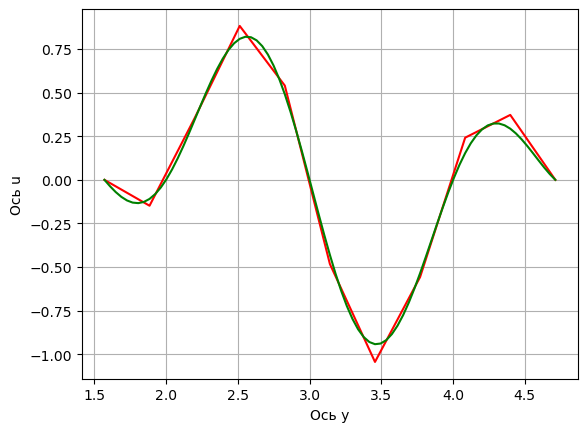

In [45]:
result(0.0001,10)